# 🕵️ Montgomery County Crime Data Analysis

This notebook loads real crime data from Montgomery County, cleans it, and visualizes trends using Python.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("crime_dataset.csv")

# Preview the data
df.head()

Matplotlib is building the font cache; this may take a moment.


,incident_id,offence_code,case_number,date,start_date,end_date,nibrs_code,victims,crimename1,crimename2,...,pra,address_number,street_prefix_dir,address_street,street_suffix_dir,street_type,latitude,longitude,police_district_number,geolocation
0,201531461,2316,250025238,NaN,2025-06-06T19:25:00.000,NaN,23H,1,Crime Against Property,All other Larceny,...,341,4700.0,NaN,IRIS,NaN,ST,0.00000,0.0000,4D,"\n, \n(0.0, 0.0)"
1,201531471,9061,250025299,2025-06-06T19:06:44.000,2025-06-06T19:06:00.000,NaN,90Z,1,Crime Against Society,All Other Offenses,...,806,7600.0,NaN,NEW HAMPSHIRE,NaN,AVE,38.98590,-76.9881,TPPD,"\n, \n(38.9859, -76.9881)"
2,201531464,2303,250025288,2025-06-06T18:52:25.000,2025-06-06T18:52:00.000,NaN,23C,1,Crime Against Property,Shoplifting,...,186,5100.0,NaN,NICHOLSON,NaN,LA,39.04554,-77.1048,2D,"\n, \n(39.0455, -77.1048)"
3,201531453,1399,250025278,2025-06-06T17:45:02.000,2025-06-06T17:45:00.000,NaN,13B,1,Crime Against Person,Simple Assault,...,399,18000.0,NaN,GEORGIA,NaN,AVE,0.00000,0.0000,4D,"\n, \n(0.0, 0.0)"
4,201531454,2399,250025275,2025-06-06T17:12:43.000,2025-06-06T17:12:00.000,NaN,23H,1,Crime Against Property,All other Larceny,...,031,7000.0,NaN,ARLINGTON,NaN,RD,38.97918,-77.0987,2D,"\n, \n(38.9792, -77.0987)"


In [11]:
# Display all column names
df.columns

Index(['incident_id', 'offence_code', 'case_number', 'date', 'start_date',
       'end_date', 'nibrs_code', 'victims', 'crimename1', 'crimename2',
       'crimename3', 'district', 'location', 'city', 'state', 'zip_code',
       'agency', 'place', 'sector', 'beat', 'pra', 'address_number',
       'street_prefix_dir', 'address_street', 'street_suffix_dir',
       'street_type', 'latitude', 'longitude', 'police_district_number',
       'geolocation'],
      dtype='object')

In [13]:
# Drop rows with missing crime names
df = df.dropna(subset=['crimename1'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where date couldn't be parsed
df = df.dropna(subset=['date'])

In [14]:
# Top 10 crime types
top_crimes = df['crimename1'].value_counts().head(10)
top_crimes

crimename1
Crime Against Society        373
Crime Against Property       363
Crime Against Person         142
Crime Against Not a Crime     21
Name: count, dtype: int64

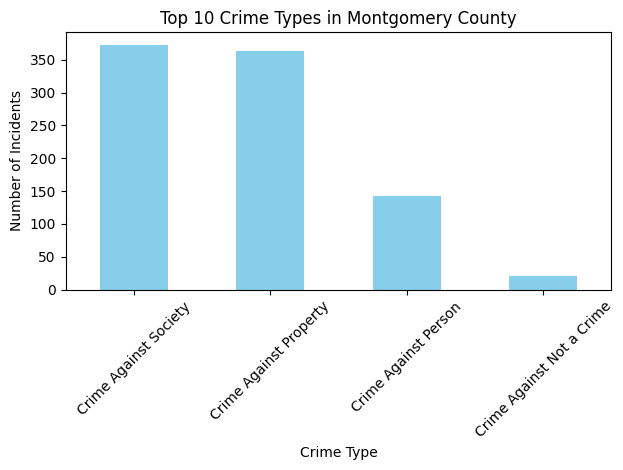

In [15]:
# Plot top 10 crimes
top_crimes.plot(kind='bar', title='Top 10 Crime Types in Montgomery County', color='skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

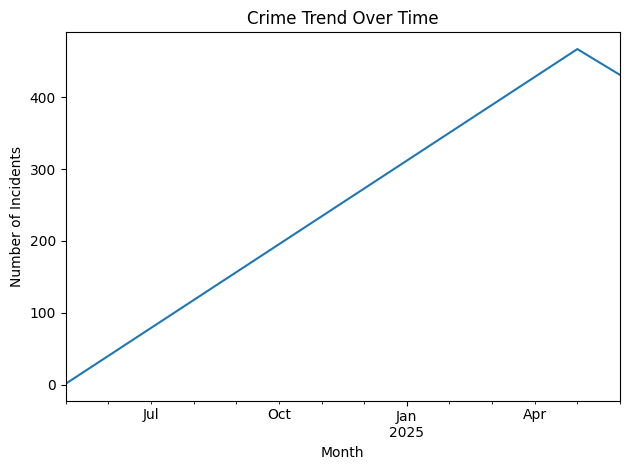

In [16]:
# Group crimes by month
df['month'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('month').size()

# Plot trend
monthly_trends.plot(kind='line', title='Crime Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()